In [170]:
__basic

Basic libraries have been loaded! Version 1.4


In [171]:
__basic_funcs

~> The following functions are defined successfully:  bg ,  shape ,  var2str ,  reduce_mem_usage ,  summary 


In [206]:
from statsmodels.tsa.ar_model import AR, ARResults

In [211]:
df = pd.read_csv('../Data/uspopulation.csv', index_col='DATE', parse_dates=True)
df.index.freq = 'MS'

In [212]:
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


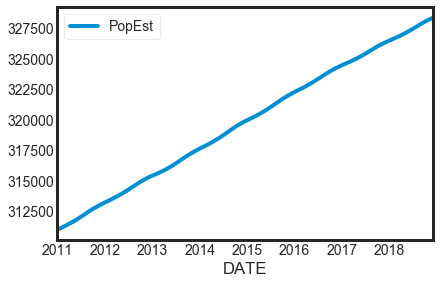

In [213]:
df.plot();

In [214]:
shape(df)

~> [df] has  96  rows, and  1  columns.


In [215]:
train = df.iloc[:84]
test  = df.iloc[84:]

In [246]:
model = AR(train['PopEst'])
AR1fit = model.fit(maxlag=1)

In [247]:
AR1fit.params

const        284.913797
L1.PopEst      0.999686
dtype: float64

In [248]:
start = len(train)
end   = len(train) + len(test) - 1

In [249]:
start, end

(84, 95)

In [250]:
y_pred1 = AR1fit.predict(start=start, end=end).rename('AR(1) Predictions')

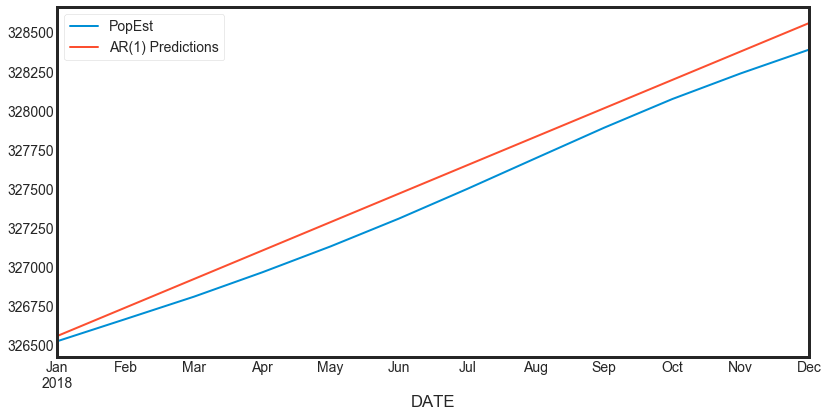

In [227]:
test.plot(figsize=(12, 6), lw=2, legend=True);
y_pred.plot(figsize=(12, 6), lw=2, legend=True);

In [228]:
AR2fit = model.fit(maxlag=2)

AR2fit.params

const        137.368305
L1.PopEst      1.853490
L2.PopEst     -0.853836
dtype: float64

In [230]:
y_pred2 = AR2fit.predict(start=start, end=end).rename('AR(2) Predictions')


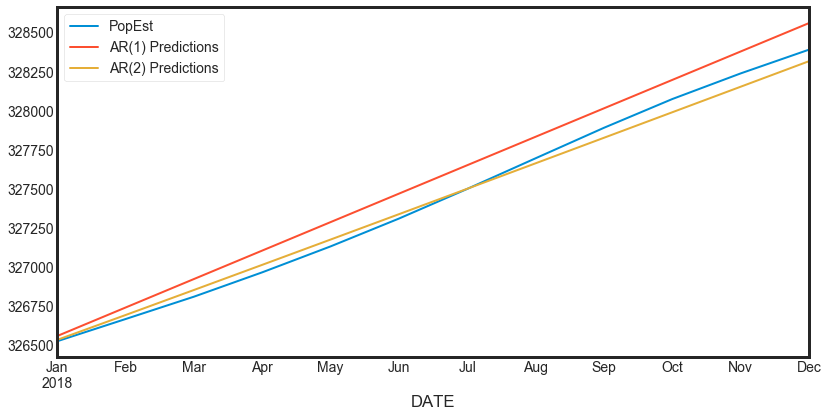

In [231]:
test.plot(figsize=(12, 6), lw=2, legend=True);
y_pred.plot(figsize=(12, 6), lw=2, legend=True);
y_pred2.plot(figsize=(12, 6), lw=2, legend=True);

In [233]:
ARfit = model.fit(ic='t-stat')

In [234]:
ARfit.params

const        82.309677
L1.PopEst     2.437997
L2.PopEst    -2.302100
L3.PopEst     1.565427
L4.PopEst    -1.431211
L5.PopEst     1.125022
L6.PopEst    -0.919494
L7.PopEst     0.963694
L8.PopEst    -0.439511
dtype: float64

In [235]:
from sklearn.metrics import mean_squared_error

In [236]:
labels = ['AR1', 'AR2', 'AR8']

In [237]:
y_pred8 = ARfit.predict(start=start, end=end).rename('AR(8) Predictions')

y_pred = [y_pred1, y_pred2, y_pred8]

In [239]:
for i in range(3):
    # np.sqrt()
    error = mean_squared_error(test['PopEst'], y_pred[i])
    print(f"{labels[i]} MSE was : {error}")

AR1 MSE was : 17449.71423587912
AR2 MSE was : 2713.2585540102214
AR8 MSE was : 186.97053754548145


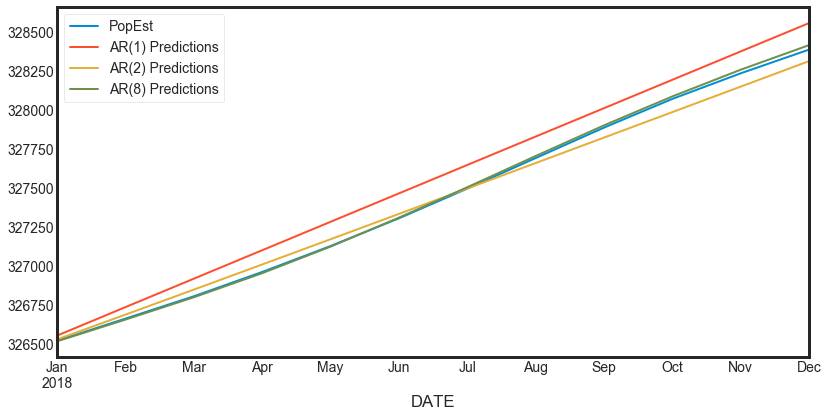

In [251]:
test.plot(figsize=(12, 6), lw=2, legend=True)
y_pred1.plot(figsize=(12, 6), lw=2, legend=True)
y_pred2.plot(figsize=(12, 6), lw=2, legend=True)
y_pred8.plot(figsize=(12, 6), lw=2, legend=True);

In [252]:
# Forecasting __Future!!!

model = AR(df['PopEst'])
ARfit = model.fit()

forecasted_values = ARfit.predict(len(df), len(df)+12).rename('Forecast')

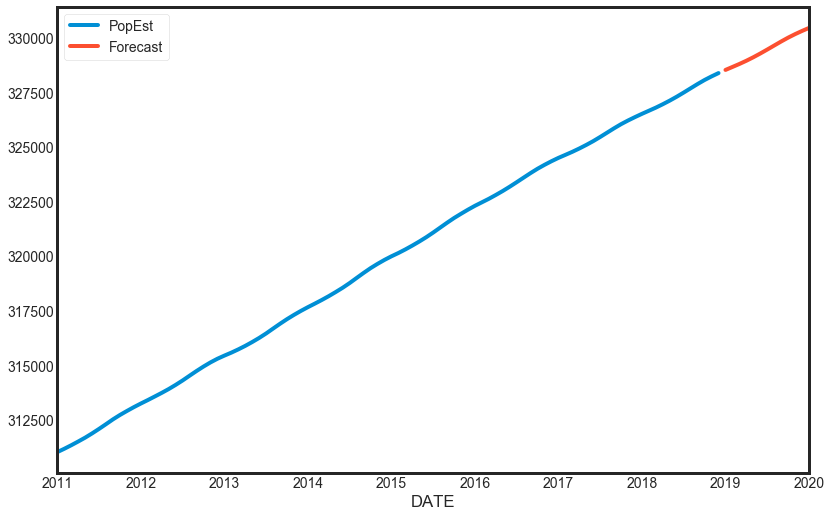

In [254]:
df['PopEst'].plot(figsize=(12, 8), legend=True)
forecasted_values.plot(legend=True)

In [ ]:
df1.plot();

In [ ]:
from statsmodels.tsa.statsmodel